# Table des matières

- # Vérifications et nettoyage des dataframes
    - ## [Customers](#section_1_1) - Vérifications et nettoyage du dataframe customers
    - ## [Products](#section_1_2) - Vérifications et nettoyage du dataframe products
    - ## [Transactions](#section_1_3) - Vérifications et nettoyage du dataframe transactions
    - ## [Products](#section_1_4) - Nettoyage complémentaire du dataframe products
    - ## [Customers](#section_1_5) - Nettoyage complémentaire du dataframe transactions
<br>

- # Jointures
    - ## [df_transactions et df_products](#section_2_1) - Première jointure
    - ## [df_transactions_products et df_customers](#section_2_2) - Deuxième jointure pour créer le dataframe final
<br>

- # Ajouts d'informations
    - ## [Dates de transactions](#section_3_1) - Ajouts de colonnes pour scinder les dates en année/mois/jour
    - ## [Discrétisation de l'âge](#section_3_2) - Ajout d'une colonne d'âge basé sur une discrétisation
<br>

- # Visualisation des données nettoyées
    - ## [Customers](#section_4_1) - Visualisation des données nettoyées de customers
    - ## [Transactions](#section_4_2) - Visualisation des données nettoyées de transactions
     - ### [Octobre 2021](#section_4_2_1) - Analyse de la baisse du mois d'octobre 2021
    - ## [Products](#section_4_3) - Visualisation des données nettoyées de products

### Import des librairies ainsi que leurs versions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime

!python --version
print('\n'.join(f'{m.__name__} {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

Python 3.9.12
pandas 1.4.2
numpy 1.21.5
seaborn 0.11.2


### Options d'affichage

In [2]:
# Affichage de seulement deux chiffres après la virgule
pd.set_option("display.precision", 2)

plt.rcParams.update({'font.size': 14})

### Import des dataframes

In [3]:
df_customers = pd.read_csv("Customers.csv")
df_products = pd.read_csv("Products.csv")
df_transactions = pd.read_csv("Transactions.csv")

#  Vérifications et nettoyages des dataframes

 ## <a class="anchor" id="section_1_1">Customers</a> - Vérifications et nettoyage du dataframe customers

In [4]:
display(df_customers.head())

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
# Infos du dataframe "customers"
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
# Vérification de doublons sur la clé "client_id"
df_customers.duplicated(subset=['client_id']).sum()

0

In [7]:
# Description du dataframe "customers"
df_customers.describe()

,birth
count,8623.00
mean,1978.28
std,16.92
min,1929.00
25%,1966.00
50%,1979.00
75%,1992.00
max,2004.00


- Il n'y a pas de valeurs nulles
- Il n'y a pas de doublons
- Pas de soucis au niveau des valeurs liées à la date de naissance

 ## <a class="anchor" id="section_1_2">Products</a> - Vérifications et nettoyage du dataframe products

In [8]:
display(df_products.head())

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [9]:
# Infos du dataframe "products"
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [10]:
# Vérification de doublons sur la clé "id_prod"
df_products.duplicated(subset=['id_prod']).sum()

0

In [11]:
# Description du dataframe "products"
df_products.describe()

,price,categ
count,3287.00,3287.00
mean,21.86,0.37
std,29.85,0.62
min,-1.00,0.00
25%,6.99,0.00
50%,13.06,0.00
75%,22.99,1.00
max,300.00,2.00


- Il n'y a pas de valeurs nulles
- Il n'y a pas de doublons
- On voit qu'il y a une valeur "-1" dans la partie "min", à surveiller de près pour la suite pour un nettoyage complémentaire
- Il y a trois catégories (0, 1 et 2)

 ## <a class="anchor" id="section_1_3">Transactions</a> - Vérifications et nettoyage du dataframe transactions

In [12]:
display(df_transactions.head())

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [13]:
# Infos du dataframe "transactions"
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [14]:
# Vérification de doublons
df_transactions.duplicated(subset=['date', 'session_id', 'client_id']).sum()

126

In [15]:
# Description du dataframe "transactions"
df_transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


<b>Il y a des valeurs de test au niveau de la date. Il y a possiblement eu des transactions fictives, il faut donc les enlever.</b>

In [16]:
# Vérification de l'id_prod avec un shape pour compter ces transactions fictives
df_transactions.loc[(df_transactions["id_prod"] == "T_0")].shape

(200, 4)

In [17]:
# On va cibler la recherche sur la transaction qui possède "T_0" en "id_prod"
df_transactions.loc[(df_transactions["id_prod"] == "T_0"), ("session_id", "date", "client_id")].describe()

,session_id,date,client_id
count,200,200,200
unique,1,39,2
top,s_0,test_2021-03-01 02:30:02.237413,ct_0
freq,200,13,106


- 200 transactions de test ont été réalisées (c'est le même "id_prod" et le même "session_id")
- Il y a deux clients "ct_0" et "ct_1" (c'est montré quand on a trié les dates)
- L'analyse montre également que le fameux prix "-1" trouvé précédemment (dans le dataframe products), fasse référence à ces tests

In [18]:
# Suppression des 200 lignes de transactions de test
df_transactions.drop(df_transactions[(df_transactions["id_prod"] == "T_0")].index, inplace=True)

In [19]:
# Conversion du type "objet" en "date" pour la colonne "date"
df_transactions["date"] = pd.to_datetime(df_transactions["date"], format='%Y-%m-%d')

In [20]:
# Vérification des modifications
df_transactions.sort_values("date", ascending=False)

,id_prod,date,session_id,client_id
84274,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575
550455,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848
130172,1_695,2023-02-28 23:53:18.929676,s_348446,c_488
588183,2_37,2023-02-28 23:51:29.318531,s_348445,c_50
184649,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573
...,...,...,...,...
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664


In [21]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


- Le résultat passe de 679 532 à 679 332 lignes (donc les 200 ont bien été supprimées et n'apparaissent plus)
- Le Dtype est bien passé en format datetime

 ## <a class="anchor" id="section_1_4">Products</a>  - Nettoyage complémentaire du dataframe products

In [22]:
# Suppression de la valeur "-1" qui correspondait aux transactions de test
df_products.drop(df_products[(df_products["id_prod"] == "T_0")].index, inplace=True)

In [23]:
# Vérification de la suppression
df_products[["price"]].describe()

,price
count,3286.00
mean,21.86
std,29.85
min,0.62
25%,6.99
50%,13.07
75%,22.99
max,300.00


 ## <a class="anchor" id="section_1_5">Customers</a>  - Nettoyage complémentaire du dataframe customers

In [24]:
# Suppression des clients tests qui ont servis aux transactions de test
df_customers.drop(df_customers[(df_customers['client_id'] == 'ct_0')].index, inplace=True)
df_customers.drop(df_customers[(df_customers['client_id'] == 'ct_1')].index, inplace=True)

In [25]:
# Ajout d'une colonne âge
current_year = datetime.now().strftime('%Y')

df_customers['age'] = int(current_year) - df_customers['birth']

# Jointures

 ## <a class="anchor" id="section_2_1">df_transactions et df_products</a> - Première jointure

In [26]:
# la colonne "id_prod" va servir de clé pour notre jointure externe à gauche pour conserver toutes nos transactions
df_transactions_products = pd.merge(df_transactions, df_products, on='id_prod', how='left', indicator=True)

In [27]:
# On va créer une fonction qui permet de tester si la jointure a bien été effectuée.
# On va créer un data frame temporaire pour rechercher une valeure qui n'est pas égale à "both" pour "_merge"
# On récupère les infos
# Si il y a des résultats différents de "both", ils seront affichés dans un head()

def test_jointure(df_transactions_products):
    df_test_transactions_products = df_transactions_products[df_transactions_products['_merge'] != 'both']
    df_test_transactions_products.info()
    
    if(df_test_transactions_products.shape[0] > 0):
        display(df_test_transactions_products.head())
        
test_jointure(df_transactions_products)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 2633 to 677797
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     221 non-null    object        
 1   date        221 non-null    datetime64[ns]
 2   session_id  221 non-null    object        
 3   client_id   221 non-null    object        
 4   price       0 non-null      float64       
 5   categ       0 non-null      float64       
 6   _merge      221 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 12.4+ KB


,id_prod,date,session_id,client_id,price,categ,_merge
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only


<b>On voit qu'il y a des valeurs manquantes dans les colonnes "price" et "categ"</b>

In [28]:
# Création d'un df pour stocker les valeurs manquantes et les analyser
df_transactions_products_nan = df_transactions_products[df_transactions_products['price'].isnull()]

In [29]:
# Aperçu du nouveau df "df_final_nan"
display(df_transactions_products_nan.head())
df_transactions_products_nan.shape

,id_prod,date,session_id,client_id,price,categ,_merge
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only


(221, 7)

<b>Premier aperçu : Toutes les valeurs manquantes ont possiblement le même "id_prod", il faut creuser encore un peu plus.</b>

In [30]:
# Vérification supplémentaire concernant les valeurs manquantes ci-dessus
df_transactions_products_nan['id_prod'].unique()

array(['0_2245'], dtype=object)

In [31]:
# Vérification au niveau du df "products"
df_products.loc[df_products['id_prod'] == '0_2245', :]

,id_prod,price,categ


- Le produit '0_2245' n'apparaît pas également dans le df des "products". 
- Les données de l'article ont probablement été perdues. Mais il possède 221 transactions, donc il vaut mieux le garder au cas où.
- Le "0" peut faire référence à la catégorie 0, cette information peut être utilisée pour modifier les données dans le bon sens
- Concernant le prix, une moyenne est possible de la catégorie 0, puis attribuer le résultat de cette moyenne au produit "0_2245"

In [32]:
# On remplace le "NaN" de la colonne "categ" par 0 suite à ces déductions
df_transactions_products["categ"].fillna(0, inplace=True)

In [33]:
# On calcule la moyenne de la colonne "price" pour la catégorie 0
estimation_prix_02245 = round(df_transactions_products.loc[df_transactions_products["categ"] == 0]["price"].mean(),2)

print(f"La moyenne du prix de l'article 02245, de la catégorie 0 est de {estimation_prix_02245} €")

La moyenne du prix de l'article 02245, de la catégorie 0 est de 10.64 €


In [34]:
# On remplace le "NaN" de la colonne "price" par 10.64 suite à ces déductions
df_transactions_products["price"].fillna(10.64, inplace=True)

In [35]:
# Vérification de ces deux modifications
df_transactions_products.loc[df_transactions_products["id_prod"] == "0_2245", :]

,id_prod,date,session_id,client_id,price,categ,_merge
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,10.64,0.0,left_only
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,10.64,0.0,left_only
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,10.64,0.0,left_only
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,10.64,0.0,left_only
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,10.64,0.0,left_only
...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,10.64,0.0,left_only
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,10.64,0.0,left_only
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,10.64,0.0,left_only
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,10.64,0.0,left_only


In [36]:
# Infos supplémentaires pour vérifier la totalité des valeurs
df_transactions_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679332 non-null  float64       
 5   categ       679332 non-null  float64       
 6   _merge      679332 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), object(3)
memory usage: 36.9+ MB


In [37]:
# Suppression de la colonne "_merge" car toutes les vérifications ont été effectuées
df_transactions_products = df_transactions_products.drop('_merge', axis=1)

 ## <a class="anchor" id="section_2_2">df_transactions_products et df_customers</a> - Deuxième jointure pour créer le dataframe final

In [38]:
# Jointure entre le df_final et df_customers. On va utiliser la colonne "client_id" tout en conservant les lignes des deux df
df_final = pd.merge(df_transactions_products, df_customers, on='client_id', indicator=True)

In [39]:
# Appel de la fonction test_jointure() pour vérifier sur la jointure s'est bien passée
test_jointure(df_final)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     0 non-null      object        
 1   date        0 non-null      datetime64[ns]
 2   session_id  0 non-null      object        
 3   client_id   0 non-null      object        
 4   price       0 non-null      float64       
 5   categ       0 non-null      float64       
 6   sex         0 non-null      object        
 7   birth       0 non-null      int64         
 8   age         0 non-null      int64         
 9   _merge      0 non-null      category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 132.0+ bytes


In [40]:
# Aperçu de la jointure
display(df_final.head())
df_final.shape

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,36,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0.0,f,1986,36,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0.0,f,1986,36,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0.0,f,1986,36,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0.0,f,1986,36,both


(679332, 10)

In [41]:
# Suppression de la colonne "_merge" car toutes les vérifications ont été effectuées
df_final = df_final.drop('_merge', axis=1)

In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679332 non-null  float64       
 5   categ       679332 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
 8   age         679332 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 51.8+ MB


In [43]:
# Remplacement du Dtype de "categ" en "int64" au lieu de "float64"
df_final['categ'] = df_final['categ'].astype('int64')

In [44]:
# Modification de la date pour s'arrêter aux secondes
df_final['date'] = df_final['date'].astype('datetime64[s]')

# Ajout d'informations

 ## <a class="anchor" id="section_3_1">Dates de transactions</a> - Ajouts de colonnes pour scinder les dates en année/mois/jour

In [45]:
# Création de trois nouvelles colonnes pour analyser plus facilement certaines données par la suite
df_final['year'] = df_final['date'].dt.year
df_final['month'] = df_final['date'].dt.month
df_final['day'] = df_final['date'].dt.day

In [46]:
# Vérification de la modification
display(df_final.head())

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year,month,day
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,4.18,0,f,1986,36,2022,5,20
1,0_1627,2022-06-18 05:55:31,s_225494,c_103,3.99,0,f,1986,36,2022,6,18
2,0_1104,2023-02-08 17:31:06,s_338755,c_103,13.21,0,f,1986,36,2023,2,8
3,0_1390,2021-04-20 06:18:39,s_23078,c_103,19.37,0,f,1986,36,2021,4,20
4,0_1547,2022-03-15 19:54:53,s_179629,c_103,8.99,0,f,1986,36,2022,3,15


 ## <a class="anchor" id="section_3_2">Discrétisation de l'âge</a> - Ajout d'une colonne d'âge basé sur une discrétisation

Application de la loi de Sturges pour une répartition de l'âge. Il faut définir une valeur approximative pour le nombre "k" en fonction de la taille N de l'échantillon.<br/>
[Discrétiser sur combien de classes ?](https://magrit.hypotheses.org/288)

In [47]:
# Regardons le nombre de clients qui servira en tant que nombre d'observations (N)

df_final['client_id'].value_counts().shape

(8600,)

In [48]:
# Formule de Sturges-Huntsberger : k = 1 + (10 ⁄ 3) × log(N)

resultat_formule = 1 + ((10 / 3) * math.log10(8600))
print("Le résultat suite à l'aide de la formule de Sturges-Huntsberger est {:,.2f}. ".format(resultat_formule))

Le résultat suite à l'aide de la formule de Sturges-Huntsberger est 14.11. 


In [49]:
# describe pour regarder les valeurs minimales et maximales qui vont être attribuées
df_final[['age']].describe()

,age
count,679332.00
mean,44.19
std,13.57
min,18.00
25%,35.00
50%,42.00
75%,52.00
max,93.00


In [50]:
# 18 ans pour la valeur min
# 93 ans pour la valeur max
# Le résultat de la formule est égal à 14. n sera donc égal à cette valeur

age_min = 18
age_max = 93
n = 14

# Calculons maintenant la tranche par intervalle
intervalle = (age_max - age_min) / n
intervalle

5.357142857142857

In [51]:
# Boucle pour définir automatiquement nos tranches d'âges qui seront attribuées
age = age_min

for elem in range(1, n):
    age = age + intervalle
    print(age)

23.357142857142858
28.714285714285715
34.07142857142857
39.42857142857142
44.78571428571428
50.14285714285713
55.499999999999986
60.85714285714284
66.2142857142857
71.57142857142856
76.92857142857142
82.28571428571428
87.64285714285714


In [52]:
# On a nos tranches d'âges, on peut les assigner à notre futur colonne
labels = ['18-23', '24-28', '29-34', '35-39', '40-44',
         '45-50', '51-55', '56-60', '61-66', '67-71',
         '72-76', '77-82', '83-87', '88-93']

df_final['range age'] = pd.cut(df_final['age'], 14, labels=labels)

In [53]:
df_final['date'] 

0        2022-05-20 13:21:29
1        2022-06-18 05:55:31
2        2023-02-08 17:31:06
3        2021-04-20 06:18:39
4        2022-03-15 19:54:53
                 ...        
679327   2021-05-15 08:17:35
679328   2021-11-08 17:12:27
679329   2021-06-01 04:31:16
679330   2022-10-18 00:38:49
679331   2021-12-18 00:38:49
Name: date, Length: 679332, dtype: datetime64[ns]

In [54]:
# Aperçu des modifications
display(df_final)

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,year,month,day,range age
0,0_1518,2022-05-20 13:21:29,s_211425,c_103,4.18,0,f,1986,36,2022,5,20,35-39
1,0_1627,2022-06-18 05:55:31,s_225494,c_103,3.99,0,f,1986,36,2022,6,18,35-39
2,0_1104,2023-02-08 17:31:06,s_338755,c_103,13.21,0,f,1986,36,2023,2,8,35-39
3,0_1390,2021-04-20 06:18:39,s_23078,c_103,19.37,0,f,1986,36,2021,4,20,35-39
4,0_1547,2022-03-15 19:54:53,s_179629,c_103,8.99,0,f,1986,36,2022,3,15,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35,s_34762,c_8114,4.99,0,m,1962,60,2021,5,15,56-60
679328,1_152,2021-11-08 17:12:27,s_116675,c_240,11.06,1,m,1998,24,2021,11,8,24-28
679329,2_207,2021-06-01 04:31:16,s_42418,c_305,50.99,2,f,1996,26,2021,6,1,24-28
679330,1_521,2022-10-18 00:38:49,s_284060,c_305,22.99,1,f,1996,26,2022,10,18,24-28


# Visualisation des données nettoyées

 ## <a class="anchor" id="section_4_1">Customers</a> - Visualisation des données nettoyées de customers

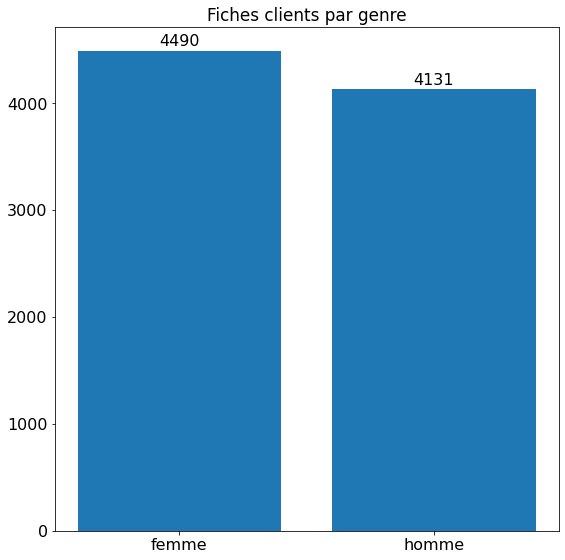

In [55]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1])
number_files_clients = df_customers['sex'].value_counts()
type_sex = ['femme', 'homme']

bars = ax.bar(type_sex, number_files_clients)
ax.bar_label(bars, padding=2, fontsize=16)
plt.title("Fiches clients par genre")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

- Il y a 4490 clients de sexe femme
- Il y a 4131 clients de sexe homme

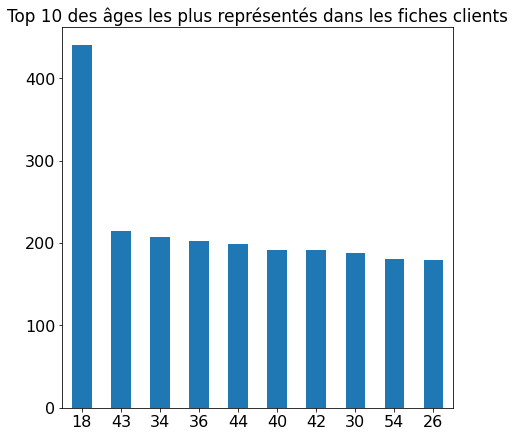

18    440
43    215
34    207
36    203
44    199
40    191
42    191
30    188
54    181
26    179
Name: age, dtype: int64

In [56]:
df_customers['age'].value_counts().head(10).plot(kind='bar', figsize=(7,7))
plt.title("Top 10 des âges les plus représentés dans les fiches clients")
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

df_customers['age'].value_counts().head(10)

<b>On retrouve sur ce graphique les 10 fiches clients les plus comptées en terme d'âge. On s'aperçoit que les fiches clients avec un âge de 18 ans est majoritaire.</b>

 ## <a class="anchor" id="section_4_2">Transactions</a> - Visualisation des données nettoyées de transactions

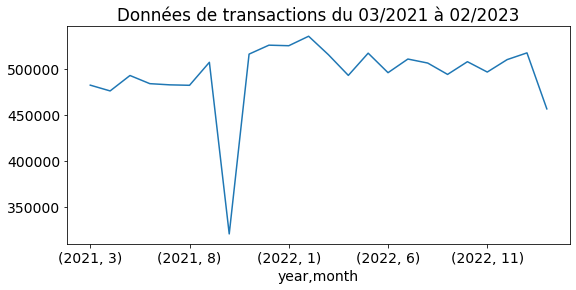

In [57]:
df_final.groupby(["year","month"])["price"].sum().plot(figsize=(9,4))
plt.title("Données de transactions du 03/2021 à 02/2023")
plt.show()

In [58]:
df_final.groupby(["year","month"])["price"].sum()

year  month
2021  3        482536.37
      4        476258.26
      5        493028.59
      6        484163.04
      7        482877.96
      8        482380.55
      9        507368.36
      10       320873.22
      11       516274.13
      12       525991.76
2022  1        525392.19
      2        535688.54
      3        515573.57
      4        493147.90
      5        517302.84
      6        496090.60
      7        510910.80
      8        506552.39
      9        494210.29
      10       508024.17
      11       496781.98
      12       510283.34
2023  1        517615.03
      2        456754.24
Name: price, dtype: float64

- Baisse (inattendu?) du chiffre d'affaire au mois d'octobre 2021. On va revenir dessus avant de finaliser à 100% le nettoyage.

 ### <a class="anchor" id="section_4_2_1">Octobre 2021</a>  - Analyse de la baisse du mois d'octobre 2021

In [59]:
# On va stocker les ventes d'octobre 2021 pour vérifier plus en détails le potentiel problème
df_octobre_2021 = df_final.loc[(df_final["year"] == 2021) & (df_final['month'] == 10), ["day", "price", "categ"]]
df_octobre_2021 = df_octobre_2021.groupby(["day", "categ"]).agg({
    "price": ["sum", "count"]
}).reset_index()

In [60]:
df_octobre_2021.columns = ["day", "categ", "ca", "volume"]
df_octobre_2021 = pd.pivot_table(df_octobre_2021, columns=["categ"], index=["day"]).reset_index()
df_octobre_2021.columns = ["day", "categ_0", "categ_1", "categ_2",
                          "vol_0", "vol_1", "vol_2"]

In [61]:
df_octobre_2021

,day,categ_0,categ_1,categ_2,vol_0,vol_1,vol_2
0,1,6950.50,7003.79,3104.05,663.0,344.0,38.0
1,2,7141.01,NaN,2041.12,661.0,NaN,28.0
2,3,6786.57,NaN,2206.48,648.0,NaN,31.0
3,4,6554.88,NaN,2746.08,603.0,NaN,38.0
4,5,6357.91,NaN,3032.55,594.0,NaN,38.0
5,6,7546.58,NaN,1944.11,702.0,NaN,26.0
6,7,6404.01,NaN,1787.07,597.0,NaN,26.0
7,8,7069.53,NaN,3137.82,669.0,NaN,44.0
8,9,6808.69,NaN,2616.67,640.0,NaN,35.0
9,10,6490.98,NaN,2334.67,600.0,NaN,29.0


On peut aperçevoir plusieurs "NaN" allant du 02/10/2021 au 27/10/2021 inclus pour la catégorie 1. Il y a donc des données qui ont été possiblement perdues durant l'export vers le csv concerné

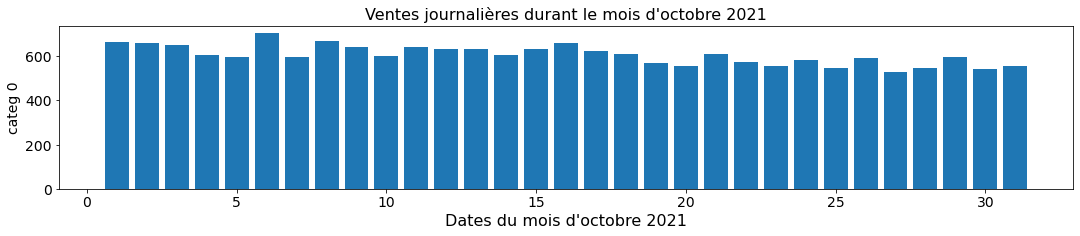

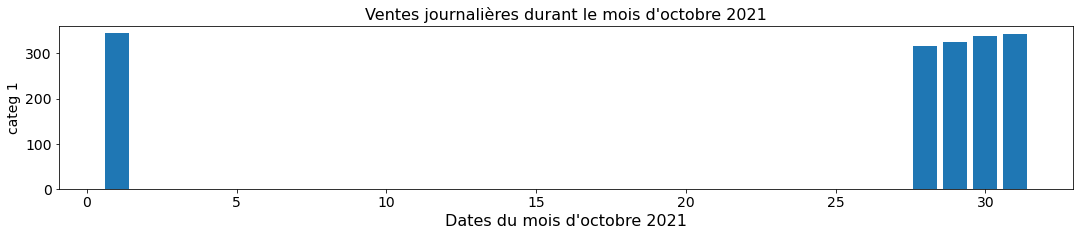

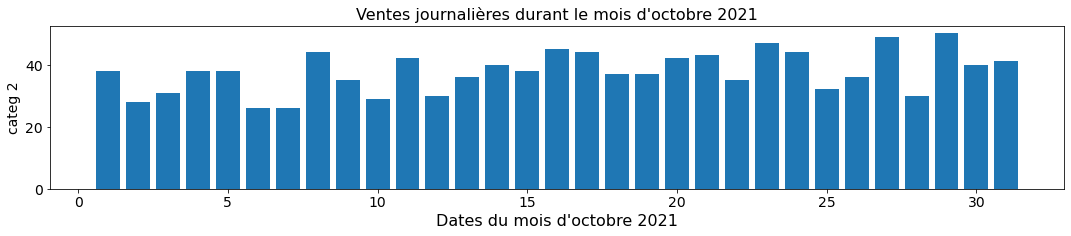

In [62]:
for i, categ in enumerate([0,1,2]):
    plt.figure(figsize=(40,3))
    plt.subplot(1, 2, 2)
    plt.bar(df_octobre_2021["day"], df_octobre_2021[f"vol_{categ}"])
    plt.xlabel("Dates du mois d'octobre 2021", fontsize=16)
    plt.ylabel(f"categ {categ}", fontsize=14)
    plt.title("Ventes journalières durant le mois d'octobre 2021", fontsize=16)
    plt.show()

Confirmation avec cette série de graphiques, représentant les trois catégories. Grâce à cette visualiation et ce résultat, on peut affirmer notre hypothèse ci-dessus (pertes de données durant l'export de ou des csv)

 ## <a class="anchor" id="section_4_3">Products</a> - Visualisation des données nettoyées de products

In [63]:
# Première visualisation sans graphique des moyennes des catégories
df_products.groupby(['categ'])['price'].mean()

categ
0     11.73
1     25.53
2    108.35
Name: price, dtype: float64

- La moyenne des produits de la catégorie 0 est à 11,73 €
- La moyenne des produits de la catégorie 1 est à 25,53 €
- La moyenne des produits de la catégorie 2 est à 108.35 €

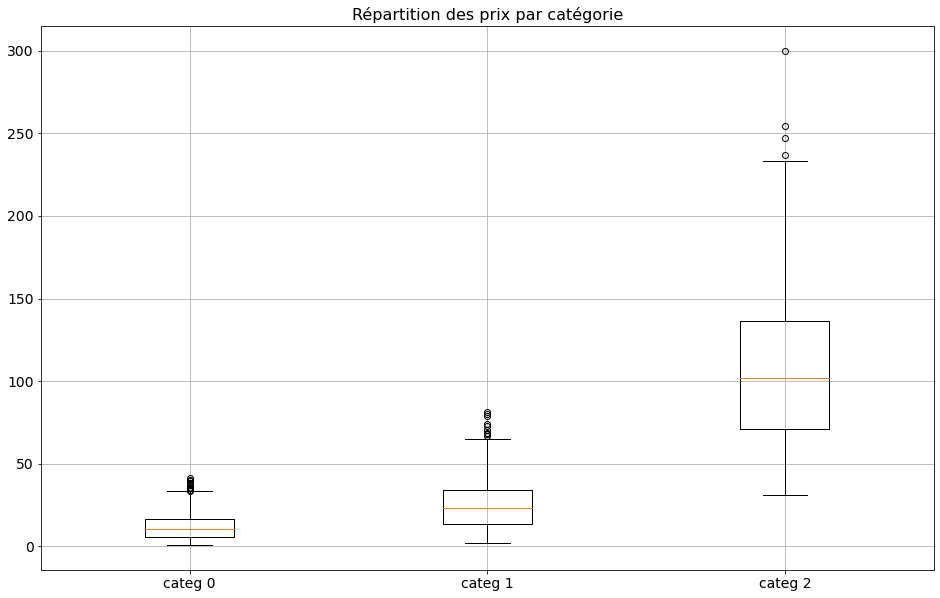

In [64]:
categ_0_mean = df_products[df_products['categ'] == 0]['price']
categ_1_mean = df_products[df_products['categ'] == 1]['price']
categ_2_mean = df_products[df_products['categ'] == 2]['price']

columns = [
    categ_0_mean,
    categ_1_mean,
    categ_2_mean
]

figure, axes = plt.subplots(figsize=(16,10))
axes.boxplot(columns)
plt.xticks(
    [1, 2, 3],
    ['categ 0', 'categ 1', 'categ 2']
)
plt.title('Répartition des prix par catégorie', fontsize=16)
plt.grid()
plt.show()

Confirmation avec ce boxplot concernant les moyennes ainsi que les distributions des différents prix des catégories 0, 1 et 2.

<b>L'analyse exploratoire des données a permis plusieurs vérifications et nettoyages au sein des dataframes. Des graphiques illustrent également une partie de ces résultats. Le dataframe final est exporté pour permettre une analyse plus poussée dans un autre notebook.

In [65]:
# Exportation du df en format csv
df_final.to_csv('df_final.csv')